In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

# from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings( "ignore", module = "seaborn\..*")

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_pickle('../datasets/counter_dataset')

df.head()

,asin,review_post_id,body,review_text,helpful_count,num_images,rating,date_posted,is_verified_purchase,is_vine_voice,num_comments,has_video,category,list_price,price_low,price_high,is_add_on,is_prime,is_prime_pantry,is_prime_exclusive,is_fresh,has_sns,offer_fulfiller,offer_merchant,lowest_price_new_condition,brand,num_reviews,num_images_pdp
0,B000I68EL8,RZZQSQMVMPTW3,it feels so comfortable and I can wear it all ...,feels comfortable i wear day!,0,0,5,2017-07-27,True,False,0,False,Women's Shoes,NaN,99.95,99.95,False,False,False,False,False,False,Houser Shoes,Houser Shoes,NaN,Birkenstock,22.0,8.0
1,B000I68EL8,RZZI5BHNRQS5Z,Package came with the end missing from the box...,package came end missing box. since it’s gift ...,0,1,3,2017-12-24,True,False,0,False,Women's Shoes,NaN,99.95,99.95,False,False,False,False,False,False,Houser Shoes,Houser Shoes,NaN,Birkenstock,22.0,8.0
2,B000I68EL8,RZN7OFKFGQO0N,Birkenstock is an amazing shoe!!!! I wish I h...,birkenstock amazing shoe!!!! i wish i ten pairs!,0,0,5,2017-05-31,True,False,0,False,Women's Shoes,NaN,99.95,99.95,False,False,False,False,False,False,Houser Shoes,Houser Shoes,NaN,Birkenstock,22.0,8.0
3,B000I68EL8,RZLEB1YTRQQ33,Delivered as advertised.... shoe looks & fits ...,delivered advertised.... shoe looks & fits exp...,0,0,5,2018-06-24,True,False,0,False,Women's Shoes,NaN,99.95,99.95,False,False,False,False,False,False,Houser Shoes,Houser Shoes,NaN,Birkenstock,22.0,8.0
4,B000I68EL8,RZI71N4TZRCMD,Second pair I have had. Nothing beats them.,second pair i had. nothing beats them.,0,0,5,2017-02-05,True,False,0,False,Women's Shoes,NaN,99.95,99.95,False,False,False,False,False,False,Houser Shoes,Houser Shoes,NaN,Birkenstock,22.0,8.0


In [3]:
# convert date column to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [4]:
print(df.isna().sum())

# drop columns with over 90% missing data
df.drop(columns = ['list_price', 'lowest_price_new_condition'], inplace = True)

# impute 'Unavailable' for categorical feature nulls
df['offer_fulfiller'].fillna('Unavailable', inplace = True)
df['offer_merchant'].fillna('Unavailable', inplace = True)

asin                               0
review_post_id                     0
body                             271
review_text                        0
helpful_count                      0
num_images                         0
rating                             0
date_posted                        0
is_verified_purchase               0
is_vine_voice                      0
num_comments                       0
has_video                          0
category                           0
list_price                    346938
price_low                     102686
price_high                    102686
is_add_on                      81357
is_prime                       81357
is_prime_pantry                81357
is_prime_exclusive             81357
is_fresh                       81357
has_sns                        81357
offer_fulfiller               309694
offer_merchant                309694
lowest_price_new_condition    323020
brand                           1342
num_reviews                     2041
n

In [5]:
# drop ['review_text'], repetitive information.

avg_rev = [len(i) for i in df['review_text']]
print(sum(avg_rev)/len(avg_rev))

avg_body = [len(str(i)) for i in df['body']]
print(sum(avg_body)/len(avg_body))

# keeping ['body'] as it contains more information
df.drop(columns = ['review_text'], inplace = True)

109.94406367578377
153.52927431774953


In [6]:
print(df[df['brand'].isna()]['asin'].value_counts())
# all observations with missing ['brand'] values have identical ['asin'] value

# investigating reviews for associated ['asin'] reveals product is Neutrogena moisturizer
for i in df[df['asin'] == 'B00NR1YQK4']['body']:
    print(i)

B00NR1YQK4    1342
Name: asin, dtype: int64
Feels really great on dry facial skin.
very lite and cooling.
I don't know how I lived without this stuff!! Love love love how it makes my skin feel. It has made a huge difference for my skin and I plan to keep this is my regimen for a long time.
Wow! Pretty good moisture ! I like the fact that this is a moisturizer WITHOUT OIL!! I have gone to  various dermatologists it seems like all my life for acne & they always tell me to use an "oil free moisturizer " since I have combination skin.  This is nice feeling , not heavy & seems to add hydration & not oil!!
This stuff is AMAZING. I would recommend highly--the eye cream too!
The Hydro Boost Gel cream gives the skin a cool moist feeling. I recommend it!
This made me break out like no tomorrow (I'm in my 30's, with oily, non-sensitive skin.)  I really wanted to like this product & was so excited to try it but I could not have been more disappointed.
I don't see big difference after using this pr

In [7]:
# all null ['brand'] values tied to same ASIN, imputed as 'Neutrogena'
df['brand'].fillna('Neutrogena', inplace = True)

# copy indexes of imputed observations
impute_neutrogena_index = df[df['asin'] == 'B00NR1YQK4'].index

# impute missing ['num_reviews'] value with total reviews
df.loc[impute_neutrogena_index, 'num_reviews'] = len(df[df['asin'] == 'B00NR1YQK4'])

df.isna().sum()

asin                         0
review_post_id               0
body                       271
helpful_count                0
num_images                   0
rating                       0
date_posted                  0
is_verified_purchase         0
is_vine_voice                0
num_comments                 0
has_video                    0
category                     0
price_low               102686
price_high              102686
is_add_on                81357
is_prime                 81357
is_prime_pantry          81357
is_prime_exclusive       81357
is_fresh                 81357
has_sns                  81357
offer_fulfiller              0
offer_merchant               0
brand                        0
num_reviews                699
num_images_pdp               0
dtype: int64

In [8]:
# no matching ASINS-pairs found between missing/available prices and num_reviews columns
# as such, any easy imputation methods are unaccesible

review_null_set = set(df[df['num_reviews'].isna()]['asin'].values)

for i in df[df['num_reviews'].isna() == False]['asin']:
    if i in review_null_set:
        print(i)

print('---')

prices_null_set = set(df[df['price_low'].isna()]['asin'].values)

for i in df[df['price_low'].isna() == False]['asin']:
    if i in prices_null_set:
        print(i)
        
print('---')

---
---


In [9]:
# confirmation that all observations are missing both price values or none
print(df[df['price_low'].isna()].shape)
print(df[df['price_high'].isna()].shape)
print(df[df['price_low'].isna() & df['price_high'].isna()].shape)

(102686, 25)
(102686, 25)
(102686, 25)


---

In [10]:
# must impute dependent variables before further investigation/preprocessing
# drop rows with missing ['body', 'review'], as dependent variables cannot be imputed without 

null_body_indexes = set()

for i in range(len(df['body'])):
    if type(df.loc[i, 'body']) != str:
        null_body_indexes.add(i)
        
print(len(null_body_indexes)) # should total to 271

df.drop(index = null_body_indexes, inplace = True)
df.reset_index(drop = True, inplace = True)

df.isna().sum()

271


asin                         0
review_post_id               0
body                         0
helpful_count                0
num_images                   0
rating                       0
date_posted                  0
is_verified_purchase         0
is_vine_voice                0
num_comments                 0
has_video                    0
category                     0
price_low               102656
price_high              102656
is_add_on                81346
is_prime                 81346
is_prime_pantry          81346
is_prime_exclusive       81346
is_fresh                 81346
has_sns                  81346
offer_fulfiller              0
offer_merchant               0
brand                        0
num_reviews                699
num_images_pdp               0
dtype: int64

In [11]:
# identify indexes of observations where review text contains keywords indicating grey-selling
# additional condition that rating value must be 2 or below, to filter out positive reviews for inaccurate designations, i.e. 'fake eyelashes'

grey_indexes = set()
grey_sales_kw = ['fake', 'counterfeit', 'counterfit', 'fraud', 'scam', 'non-authorized', 'been used before', 'not real ']

for i in range(len(df['body'])):
    for n in grey_sales_kw:
        if n in df.loc[i, 'body'] and df.loc[i, 'rating'] <= 2:
            grey_indexes.add(i)
            break
            
# create column for dependent variable ['grey_sale'] based on grey_indexes
df['grey_sale'] = df.index.map(lambda i: 1 if i in grey_indexes else 0)

df['grey_sale'].value_counts(normalize = True)
# severely imbalanced classes

0    0.996173
1    0.003827
Name: grey_sale, dtype: float64

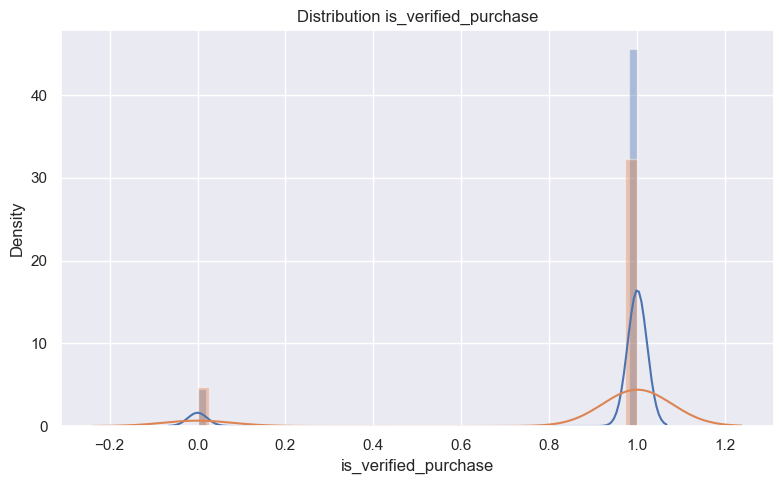

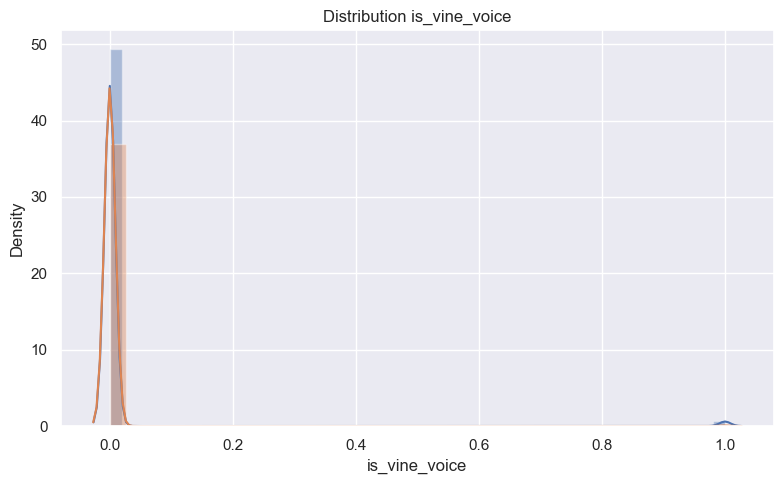

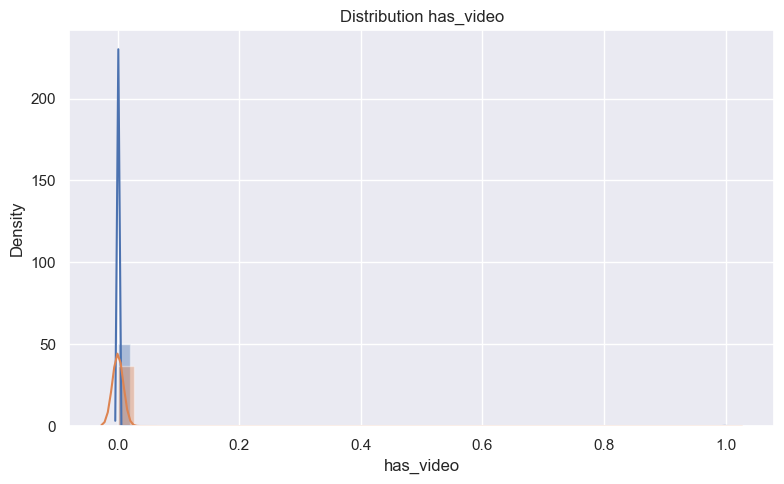

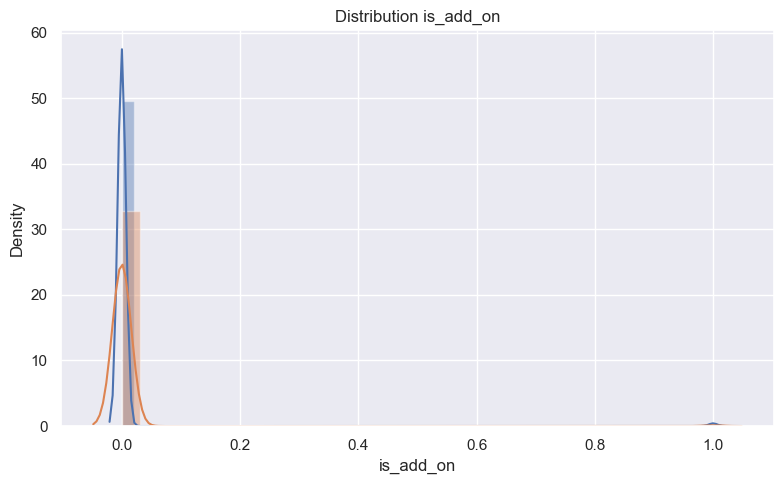

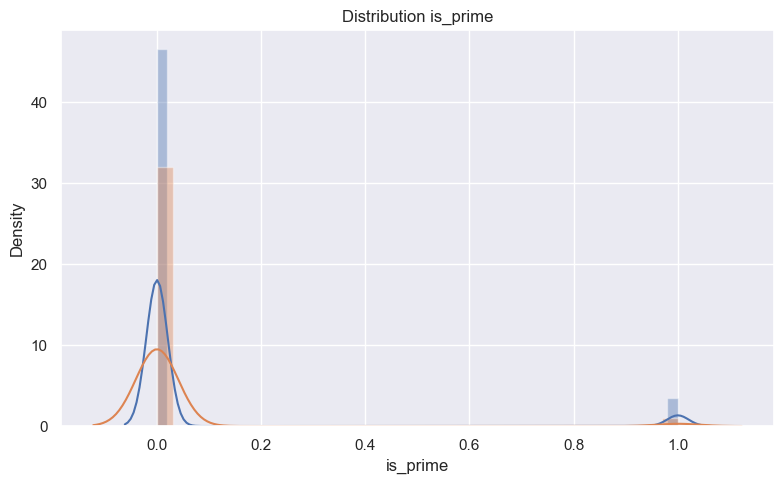

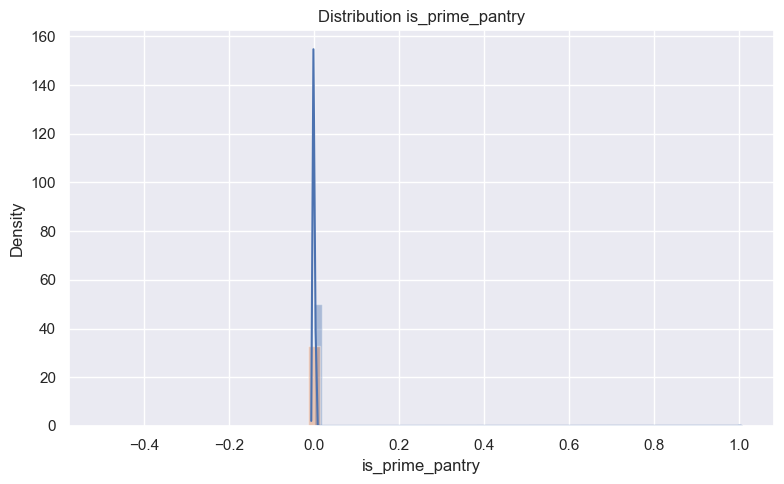

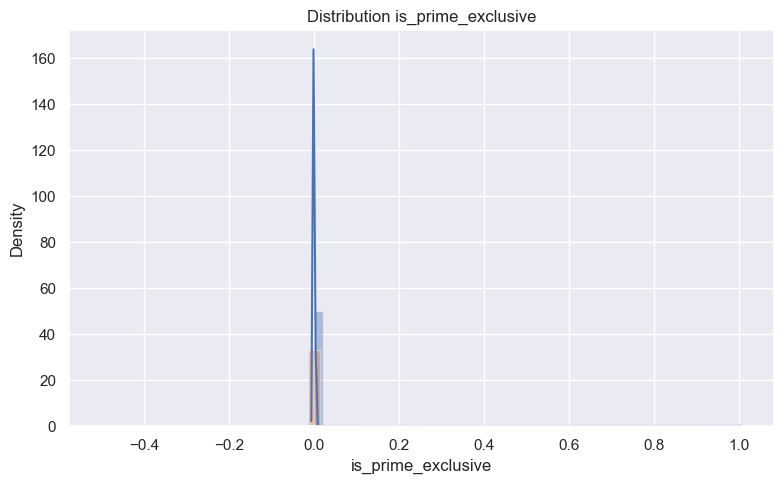

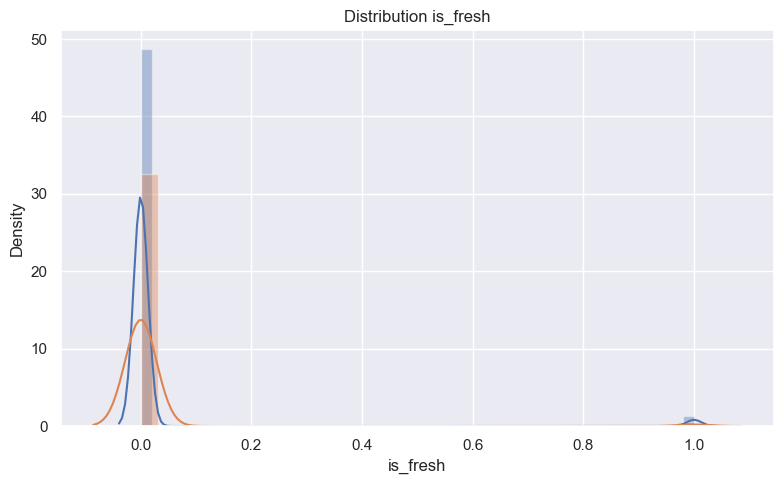

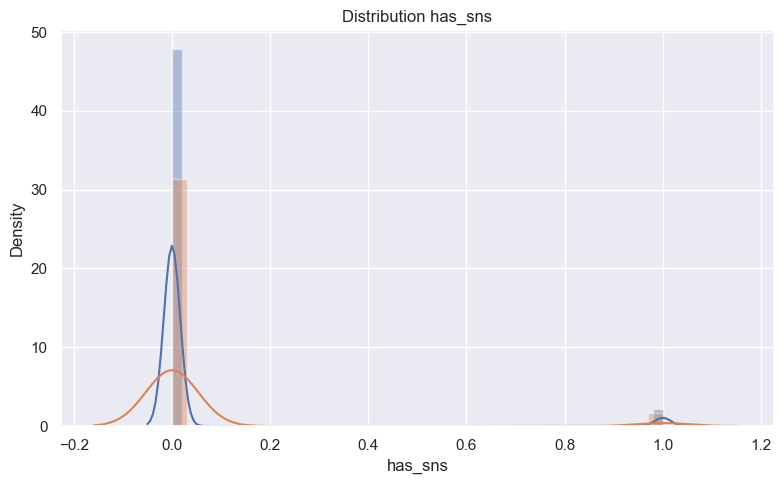

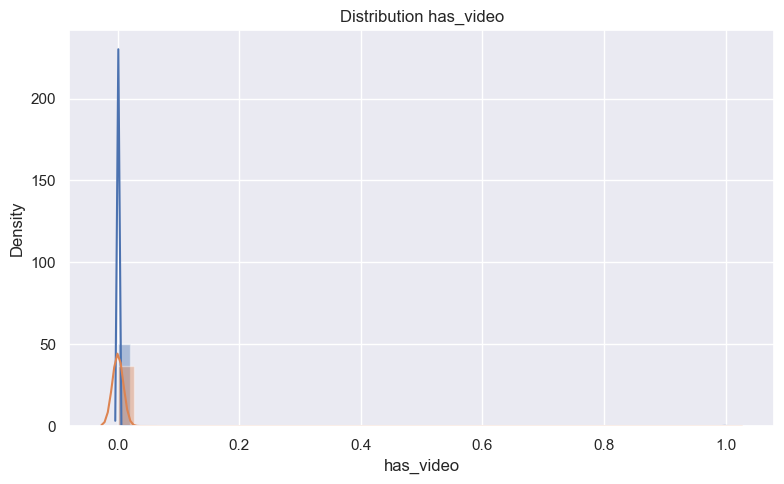

In [12]:
for i in ['is_verified_purchase', 'is_vine_voice', 'has_video', 'is_add_on', 'is_prime', 'is_prime_pantry', 'is_prime_exclusive',
          'is_fresh', 'has_sns', 'has_video']:
    plt.figure(figsize = (8, 5))
    sns.distplot(df[df['grey_sale'] == 0][i], label = 'Non-Grey')
    sns.distplot(df[df['grey_sale'] == 1][i], label = 'Non-Grey')
    plt.title(f'Distribution {i}')
    plt.tight_layout()
    
# taking a look at distributions for boolean features, to see if there is anything interesting happening
# between grey and non-grey sales

In [13]:
for i in ['is_verified_purchase', 'is_vine_voice', 'has_video', 'is_add_on', 'is_prime', 'is_prime_pantry', 'is_prime_exclusive',
          'is_fresh', 'has_sns', 'has_video']:
    print('Non-Grey Sale Distribution')
    print(df[df['grey_sale'] == 0][i].value_counts(normalize = True))
    print('Grey Sale Distribution')
    print(df[df['grey_sale'] == 1][i].value_counts(normalize = True))
    print('---------------------------------------------------------------')
    
# drop all boolean columns with non-interesting, non-distinguishing distribution
df.drop(columns = ['is_verified_purchase', 'is_vine_voice', 'has_video', 'is_add_on', 'is_prime_pantry', 'is_prime_exclusive',
          'is_fresh', 'has_sns', 'has_video'], inplace = True)

# all boolean columns dropped except ['is_prime']

Non-Grey Sale Distribution
True     0.91089
False    0.08911
Name: is_verified_purchase, dtype: float64
Grey Sale Distribution
True     0.871085
False    0.128915
Name: is_verified_purchase, dtype: float64
---------------------------------------------------------------
Non-Grey Sale Distribution
False    0.986825
True     0.013175
Name: is_vine_voice, dtype: float64
Grey Sale Distribution
False    0.998543
True     0.001457
Name: is_vine_voice, dtype: float64
---------------------------------------------------------------
Non-Grey Sale Distribution
False    0.999684
True     0.000316
Name: has_video, dtype: float64
Grey Sale Distribution
False    0.998543
True     0.001457
Name: has_video, dtype: float64
---------------------------------------------------------------
Non-Grey Sale Distribution
False    0.99283
True     0.00717
Name: is_add_on, dtype: float64
Grey Sale Distribution
False    0.995652
True     0.004348
Name: is_add_on, dtype: float64
--------------------------------------

In [14]:
df['brand'] = df['brand'].map(lambda i: 'New Balance' if i == 'New' else i)
# brand 'New Balance' imputed over brand 'New'
df['brand'] = df['brand'].map(lambda i: 'Calvin Klein' if i == 'Calvin' else i)
# brand 'Calvin Klein' imputed over brand 'Calvin'
# df['review_text'] confirms imputations are correct

# combining categorical values
df['offer_merchant'] = df['offer_merchant'].map(lambda i: 'Amazon.com' if i == 'Amazon.com in easy-to-open packaging' else i)

In [15]:
# generate columns for average price of specific product-code ['asin'] values and the delta of any specific observation
# from the average
fill_keys = df['price_low'].groupby(df['asin']).mean().index
fill_vals = df['price_low'].groupby(df['asin']).mean().values
zip(fill_keys, fill_vals)
mean_price_dict = {k:round(v, 2) for (k, v) in zip(fill_keys, fill_vals)}

df['avg_price'] = df['asin'].map(lambda i: mean_price_dict[i])
df['price_delta'] = df['avg_price'] - df['price_low']

In [17]:
# initial train-test split to set aside 10% of data for final model evaluation
# dropna() dataframe and standard dataframes available

df_dropna = df.dropna().reset_index(drop = True)
#dropna_train, dropna_test = train_test_split(df_dropna, test_size = 0.1, stratify = df_dropna['grey_sale'], random_state = 22)
#train, test = train_test_split(df, test_size = 0.1, stratify = df['grey_sale'], random_state = 22)

# exports
#dropna_train.to_csv('../datasets/dropna_train.csv', index = False)
#dropna_test.to_csv('../datasets/dropna_test.csv', index = False)

#train.to_csv('../datasets/std_train_set.csv', index = False)
#test.to_csv('../datasets/std_test_set.csv', index = False)

df[['body', 'grey_sale']].to_csv('../datasets/NLP_df.csv', index = False)
df.to_csv('../datasets/std_clean_df.csv', index = False)
df_dropna.to_csv('../datasets/dropna_df.csv', index = False)